# Deep Learning for Computer Vision
## PyConDE 2017 Talk
### Alex Conway alex@numberboost.com

# Setup

## imports

load vgg

In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.set_image_dim_ordering('th')

for plotting and misc

In [4]:
# setup matplotlib to display plots in the notebook
%matplotlib inline

# third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setup display options
pd.options.display.max_rows = 200
pd.options.display.float_format = '{:,.5g}'.format
np.set_printoptions(precision=5, suppress=False)

# setup seaborn to use matplotlib defaults & styles
sns.set()
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})

import os
import sys
import time

for PCA

In [160]:
from sklearn.decomposition import PCA

turn off jupyter notebook keras warnings

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

## paths

In [6]:
pwd = '/mnt/data/pycon/'

In [7]:
path_models = pwd + 'models/'
# for previewing data augmentation output:
# path_preview = path + 'data/preview/' 

In [8]:
path_data = pwd + 'data/'

In [9]:
path_data_train = path_data +'train/'
path_data_valid = path_data +'valid/'
path_data_test = path_data +'test/'
# output
path_data_train, path_data_valid, path_data_test

('/mnt/data/pycon/data/train/',
 '/mnt/data/pycon/data/valid/',
 '/mnt/data/pycon/data/test/')

In [10]:
!tree -d /mnt/data/pycon/

/mnt/data/pycon/
├── data
│   ├── test
│   │   └── unknown
│   ├── train
│   │   ├── accessories
│   │   ├── jackets
│   │   ├── jeans
│   │   ├── knitwear
│   │   ├── shirts
│   │   ├── shoes
│   │   ├── shorts
│   │   └── tees
│   └── valid
│       ├── accessories
│       ├── jackets
│       ├── jeans
│       ├── knitwear
│       ├── shirts
│       ├── shoes
│       ├── shorts
│       └── tees
└── models

22 directories


# View some of the data

In [11]:
def plotimg(imgpath):
    img= plt.imread(imgpath)
    imgplot = plt.imshow(img)

In [12]:
def plot_pic_grid(path, filenames, add_title=True):
    # set figsize
    fig = plt.figure()
    fig.set_size_inches((16,8))

    plotted = 0

    for c, r in enumerate(filenames):

        # get path to image file 
        img_path_on_disk = path + r

        if len(img_path_on_disk) > 0:    

            if plotted < 10:

                plotted+=1

                # plotting 10 images
                a = fig.add_subplot(2, 5, (plotted))
                img= plt.imread(img_path_on_disk)
                imgplot = a.imshow(img)
                if add_title: 
                    a.set_title(r)

                #print user_id, 'image plotted'
        else:
            # print user_id, 'no pic available'
            pass

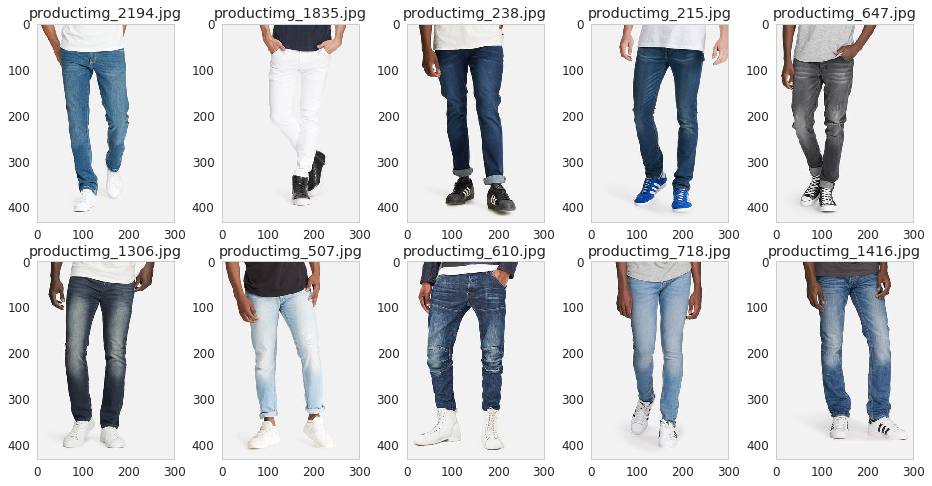

In [13]:
plot_pic_grid(path_data +'train/jeans/', os.listdir(path_data +'train/jeans/')[:10])

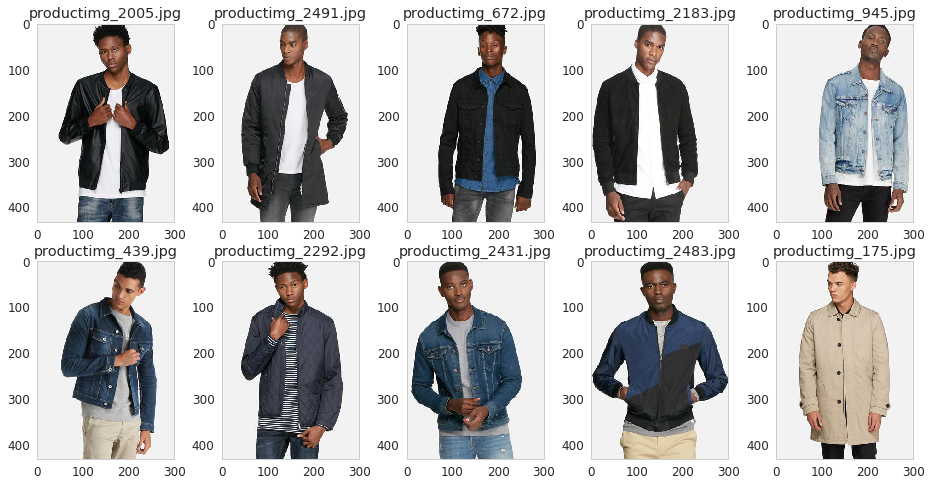

In [14]:
plot_pic_grid(path_data +'train/jackets/', os.listdir(path_data +'train/jackets/')[:10])

# Fit Model

We don't have a lot of data so we'll use a pre-trained convolutional. 

This pre-trained network was built to predict which of 1000 ImageNet classes a particular image belongs to so the weights and convolutional filters are able to detect a wide variety of shapes and patterns. 

We'll then chop off the final dense layers and keep only the pre-trained convolutional layers ("bottleneck features"). 

Next, we'll create our own final layers and train just these final layers for our task...

## Setup image dimensions and number of samples

In [16]:
# dimension our images will be rescaled to (default size for VGG)
img_width, img_height = 224, 224

## Instantiate pre-trained VGGNet and load weights

https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069

In [17]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [171]:
# https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

Download pre-trained weights

In [172]:
# run the command line function below to download pre-trained VGG weights:
# !wget https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_th_dim_ordering_th_kernels.h5

In [173]:
path_pretrained_vgg = '/mnt/data/pretrained_weights/vgg16_weights_th_dim_ordering_th_kernels.h5'

load pretrained weights

In [174]:
model.load_weights(path_pretrained_vgg)

In [175]:
# pop layers until just have the bottleneck max pooling 512,7,7 layer
for i in range(0,6):
    model.layers.pop()
    
model.outputs = [model.layers[-1].output]
model.layers[-1].outbound_nodes = []

In [176]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [177]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 64, 114, 114)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 112, 112)     73856     
__________

> notice now the final layer of the network is the 512 x 7 x 7 bottleneck layer

## Precompute bottleneck outputs for train and validation data

> We precompute the bottleneck features since that's where most of the computation time is - once we've precomputed them, we'll just learn the weights on final layer(s) added on top of the bottleneck features but if we didn't precompute them, we'd have to compute them each time we pass an image through the entire network even though we're only learning weights on the final layer. 

create generators

In [26]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator_bottleneck = datagen.flow_from_directory(
        path_data_train,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode=None,
        shuffle=False)

Found 3467 images belonging to 8 classes.


In [28]:
validation_generator_bottleneck = datagen.flow_from_directory(
        path_data_valid,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode=None,
        shuffle=False)

Found 382 images belonging to 8 classes.


In [29]:
train_generator_bottleneck.class_indices

{'accessories': 0,
 'jackets': 1,
 'jeans': 2,
 'knitwear': 3,
 'shirts': 4,
 'shoes': 5,
 'shorts': 6,
 'tees': 7}

In [30]:
validation_generator_bottleneck.class_indices

{'accessories': 0,
 'jackets': 1,
 'jeans': 2,
 'knitwear': 3,
 'shirts': 4,
 'shoes': 5,
 'shorts': 6,
 'tees': 7}

precompute bottleneck features

In [31]:
bottleneck_features_train = model.predict_generator(train_generator_bottleneck, train_generator_bottleneck.n, verbose = 1)
np.save(open(path_models + 'bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

3467/3467 [==============================] - 102s   


In [32]:
bottleneck_features_validation = model.predict_generator(validation_generator_bottleneck, validation_generator_bottleneck.n, verbose = 1)
np.save(open(path_models + 'bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

381/382 [============================>.] - ETA: 0s

In [33]:
train_data = np.load(open(path_models + 'bottleneck_features_train.npy', 'rb'))
train_labels = train_generator_bottleneck.classes

validation_data = np.load(open(path_models + 'bottleneck_features_validation.npy', 'rb'))
validation_labels = validation_generator_bottleneck.classes

## Add new final layer(s)

add fully connected layers (on top of bottleneck convolutional layers)

> Can play around with the number and size of dense layers we add here...

In [59]:
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(len(np.unique(train_labels)), activation='softmax'))

I tried a bunch of optimizers and got the highest val_acc on VGG with adadelta, near runner up was adam

In [60]:
model_top.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [164]:
model_top.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 2056      
Total params: 6,424,840
Trainable params: 6,424,840
Non-trainable params: 0
_________________________________________________________________


## Learn weights on new final layer(s)

In [61]:
model_name = 'VGG_finetuned'

In [62]:
# define keras model checkpointer to save best model (highets val_acc)
checkpointer = ModelCheckpoint(path_models + model_name + '_BEST_.hdf5', 
                                monitor='val_acc', 
                                save_best_only=True,
                                save_weights_only=True)

In [63]:
nb_epoch = 100

In [159]:
# fit model, storing history in variable to plot learning curves
history = model_top.fit(train_data, 
                train_labels,
                nb_epoch=nb_epoch, 
                batch_size=32,
                validation_data=(validation_data, validation_labels),
                callbacks=[checkpointer])

Train on 3467 samples, validate on 382 samples
Epoch 1/100
3467/3467 [==============================] - 1s - loss: 0.1449 - acc: 0.9420 - val_loss: 0.1940 - val_acc: 0.9424
Epoch 2/100
3467/3467 [==============================] - 1s - loss: 0.1214 - acc: 0.9533 - val_loss: 0.1938 - val_acc: 0.9581
Epoch 3/100
3467/3467 [==============================] - 1s - loss: 0.1203 - acc: 0.9518 - val_loss: 0.1730 - val_acc: 0.9555
Epoch 4/100
3467/3467 [==============================] - 1s - loss: 0.1081 - acc: 0.9596 - val_loss: 0.1859 - val_acc: 0.9529
Epoch 5/100
3467/3467 [==============================] - 1s - loss: 0.1029 - acc: 0.9570 - val_loss: 0.2690 - val_acc: 0.9346
Epoch 6/100
3467/3467 [==============================] - 1s - loss: 0.1063 - acc: 0.9639 - val_loss: 0.2070 - val_acc: 0.9607
Epoch 7/100
3467/3467 [==============================] - 1s - loss: 0.0764 - acc: 0.9680 - val_loss: 0.2278 - val_acc: 0.9424
Epoch 8/100
3467/3467 [==============================] - 1s - loss: 0.0

# Plot learning curves

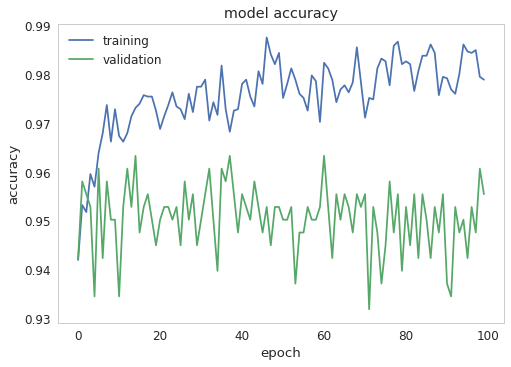

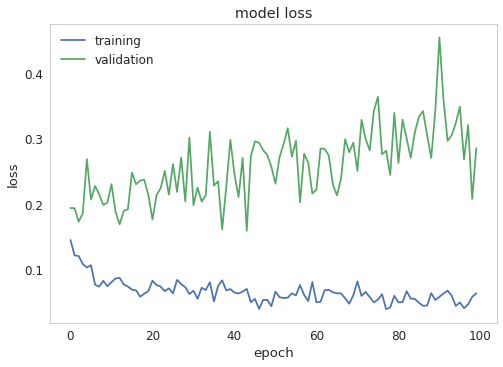

In [161]:
# plot accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [162]:
# load weights from best epoch (saved by checkpointer)
model_top.load_weights(path_models + model_name + '_BEST_.hdf5')

In [163]:
# check metrics for this best model
print (model_top.metrics_names)
model_top.evaluate(validation_data, validation_labels, verbose = 0)

['loss', 'acc']


[0.16105182613130337, 0.96335079282990299]

# View predictions and some examples where the model is going wrong

## Define function to do prediction

In [70]:
# Need to get bottleneck features from model 
# then feed these to model_top to do actual prediction
def get_prediction(img_path, return_probabilities = False):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis=0)
    x = model.predict(x)
    x = model_top.predict(x)
    if return_probabilities:
        return x
    else:
        return np.argmax(x)

In [75]:
# fit model, storing history in variable to plot learning curves
predictions = model_top.predict(validation_data, 
                                batch_size=32)

In [85]:
# get argmax of each row in predictions output (which is a probability distribution)
# there's definitely a way to do this with numpy but I'm being lazy and looping...
predictions_labels = []

for c, row in enumerate(predictions):
    predictions_labels.append(np.argmax(row))

In [132]:
# build dataframe
df = pd.DataFrame({"filename":validation_generator_bottleneck.filenames, "prediction": predictions_labels, "truth": validation_labels})
df['correct'] = (df['prediction'] == df['truth']).astype(int)
df['correct'] = df['correct'].astype(int)
df['prediction'] = df['prediction'].astype(int)

In [133]:
# join class names
df_names = pd.DataFrame.from_dict(validation_generator_bottleneck.class_indices, orient = 'index')
df_names.columns = ['idx']
df_names['name'] = df_names.index
#
df = pd.merge(df,df_names,left_on = 'prediction', right_on='idx', how='left')
del df['idx']

In [135]:
df.columns = ['filename','prediction','truth','correct','prediction_name']

In [136]:
df = pd.merge(df,df_names,left_on = 'truth', right_on='idx', how='left')
del df['idx']

In [137]:
df.columns = ['filename','prediction','truth','correct','prediction_name','truth_name']

In [138]:
df.tail()

,filename,prediction,truth,correct,prediction_name,truth_name
377,tees/productimg_774.jpg,7,7,1,tees,tees
378,tees/productimg_3815.jpg,7,7,1,tees,tees
379,tees/productimg_4073.jpg,7,7,1,tees,tees
380,tees/productimg_2408.jpg,7,7,1,tees,tees
381,tees/productimg_1355.jpg,3,7,0,knitwear,tees


errors:

In [154]:
df[df['correct'] == 0]

,filename,prediction,truth,correct,prediction_name,truth_name
29,jackets/productimg_2592.jpg,3,1,0,knitwear,jackets
96,knitwear/productimg_1369.jpg,4,3,0,shirts,knitwear
101,knitwear/productimg_728.jpg,1,3,0,jackets,knitwear
104,knitwear/productimg_1143.jpg,1,3,0,jackets,knitwear
106,knitwear/productimg_2052.jpg,7,3,0,tees,knitwear
115,shirts/productimg_737.jpg,3,4,0,knitwear,shirts
118,shirts/productimg_167.jpg,7,4,0,tees,shirts
123,shirts/productimg_840.jpg,3,4,0,knitwear,shirts
131,shirts/productimg_274.jpg,7,4,0,tees,shirts
288,tees/productimg_1499.jpg,4,7,0,shirts,tees


> Let's plot some of the errors

Prediction = shirt, truth = tee ... can see why the model predicted shirt lol

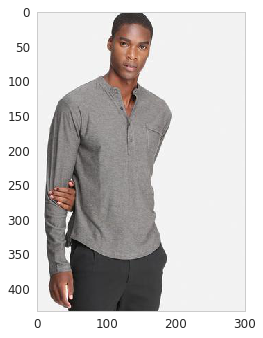

In [145]:
plotimg(path_data_valid + "tees/productimg_1499.jpg")

> Model prediction = knitwear but truth = jacket

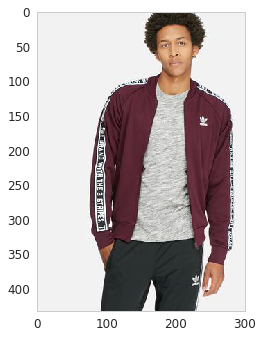

In [151]:
plotimg(path_data_valid + "jackets/productimg_2592.jpg")

# Get activation vectors

## Pop off final softmax layer and only keep activations from model top

In [185]:
model_top.layers.pop()
model_top.layers.pop()

model_top.outputs = [model_top.layers[-1].output]
model_top.layers[-1].outbound_nodes = []

model_top.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [209]:
model_top.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
Total params: 6,422,784
Trainable params: 6,422,784
Non-trainable params: 0
_________________________________________________________________


## define function to get activations

In [230]:
# Need to get bottleneck features from model 
# then feed these to model_top to get activations from fine-tuned new dense layer
def get_activation(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis=0)
    x = model.predict(x)
    x = model_top.predict(x)
    return x[0]

## get activations for each validation image

In [304]:
activations_list = []

for image_path in train_generator_bottleneck.filenames:
    #print (path_data_valid + image_path)
    activations_list.append(get_activation(path_data_train + image_path))

In [305]:
len(activations_list)

3467

In [306]:
type(activations_list[0])

numpy.ndarray

In [307]:
# cast activations to numpy matrix
activations = np.asmatrix(activations_list)

In [308]:
# cast activations to dataframe
adf = pd.DataFrame(activations)

In [347]:
adf['filename'] = train_generator_bottleneck.filenames

In [348]:
adf.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,filename
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,accessories/productimg_1610.jpg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,accessories/productimg_1312.jpg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,accessories/productimg_1.jpg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,accessories/productimg_1247.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,accessories/productimg_1246.jpg


# Get Most Visually Similar Products

## get activation for test image

In [349]:
os.listdir(path_data_test + 'unknown')

['test6.jpg',
 'test3.jpg',
 'test7.jpg',
 'test1.jpg',
 'test8.jpg',
 'test5.jpg',
 'test4.jpg',
 'test2.jpg']

In [367]:
def get_most_similar(test_img_path):
    test_img_vec = get_activation(test_img_path)

    # do dot prod
    test_img_vec = test_img_vec.reshape(len(test_img_vec),1)
    a = np.dot(activations, test_img_vec)

    # transform scores
    results = pd.DataFrame(a)
    results['filenames'] = adf['filename']
    results.columns = ['scores', 'filenames']
    results.sort_values('scores', ascending = False, inplace = True)
    results.head()

    # get matches
    matches = results['filenames'].values[:10]
    match_scores = results['scores'].values[:10]
    
    return matches

In [362]:
def plot_pic_grid(filenames):
    # set figsize
    fig = plt.figure()
    fig.set_size_inches((16,8))

    plotted = 0

    for c, r in enumerate(filenames):

        # get path to image file 
        img_path_on_disk = path_data_train + r

        if len(img_path_on_disk) > 0:    

            if plotted < 10:

                plotted+=1

                # plotting 10 images
                a = fig.add_subplot(2, 5, (plotted))
                img= plt.imread(img_path_on_disk)
                imgplot = a.imshow(img)
                a.set_title(match_scores[c])

                #print user_id, 'image plotted'
        else:
            # print user_id, 'no pic available'
            pass

In [371]:
[path_data_test + 'unknown/' + f for f in os.listdir(path_data_test + 'unknown/')]

['/mnt/data/pycon/data/test/unknown/test6.jpg',
 '/mnt/data/pycon/data/test/unknown/test3.jpg',
 '/mnt/data/pycon/data/test/unknown/test7.jpg',
 '/mnt/data/pycon/data/test/unknown/test1.jpg',
 '/mnt/data/pycon/data/test/unknown/test8.jpg',
 '/mnt/data/pycon/data/test/unknown/test5.jpg',
 '/mnt/data/pycon/data/test/unknown/test4.jpg',
 '/mnt/data/pycon/data/test/unknown/test2.jpg']

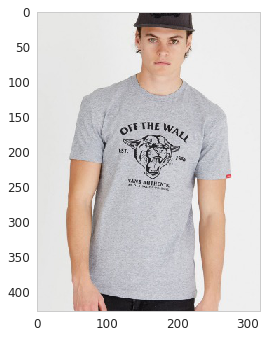

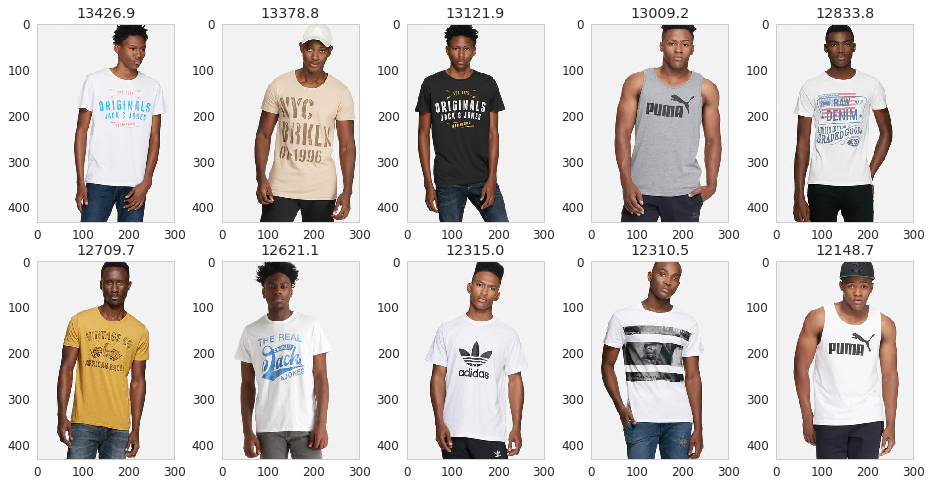

In [375]:
test_img_path = '/mnt/data/pycon/data/test/unknown/test6.jpg'
plotimg(test_img_path)
plot_pic_grid(get_most_similar(test_img_path))

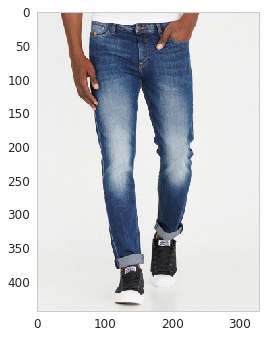

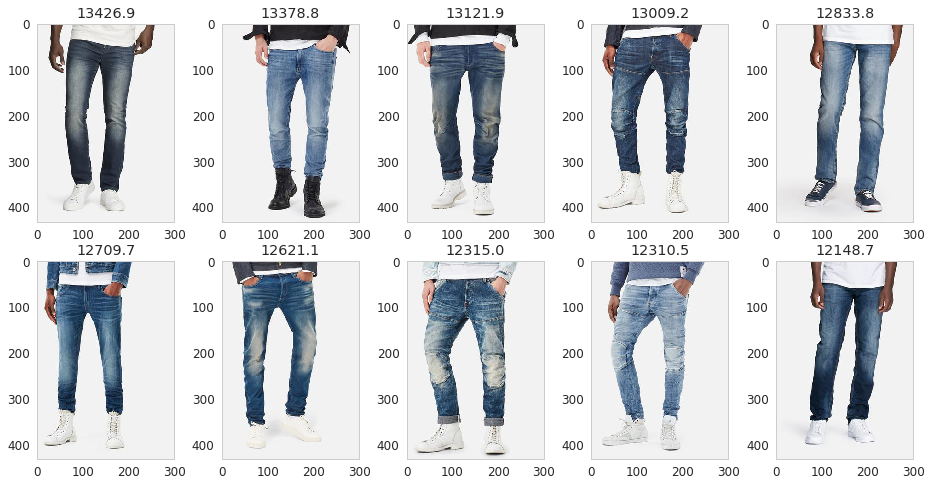

In [374]:
test_img_path = '/mnt/data/pycon/data/test/unknown/test5.jpg'
plotimg(test_img_path)
plot_pic_grid(get_most_similar(test_img_path))

# Do PCA on activations

In [353]:
vec

NameError: name 'vec' is not defined

In [257]:
ff = adf.copy()
del ff['filename']

In [264]:
n_points = 100

In [356]:
matches

array(['tees/productimg_3255.jpg', 'tees/productimg_4024.jpg',
       'tees/productimg_4242.jpg', 'tees/productimg_3588.jpg',
       'tees/productimg_3336.jpg', 'tees/productimg_3522.jpg',
       'tees/productimg_3213.jpg', 'tees/productimg_992.jpg',
       'tees/productimg_4155.jpg', 'tees/productimg_4238.jpg'], dtype=object)

In [293]:
#ff = f_targets[f_targets['country'] == 'BR']
#del ff['country']

from sklearn.decomposition import PCA
pca = PCA(n_components=8)
t_pcs = pca.fit(ff.values.T).components_
t_pcs.shape

# first 2 PCs
fac0 = t_pcs[0]
fac1 = t_pcs[1]

start=200
end = 350
X = fac0[start:end]
Y = fac1[start:end]

point_images = [path_data_valid + f for f in list(adf['filename'].values)] 

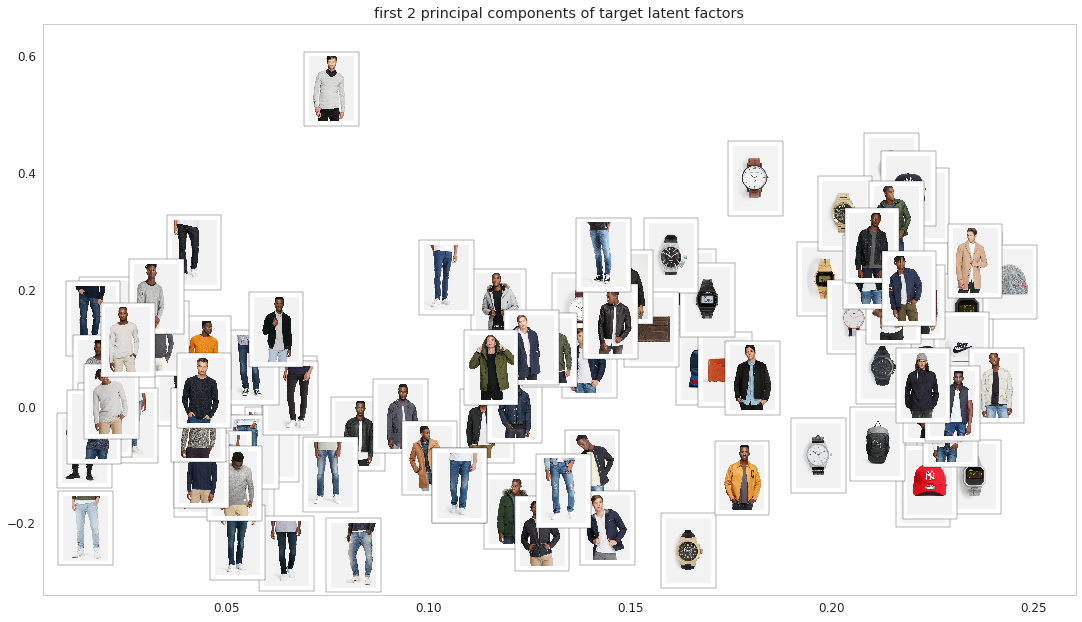

In [294]:
# # https://stackoverflow.com/questions/4860417/placing-custom-images-in-a-plot-window-as-custom-data-markers-or-to-annotate-t
import matplotlib.pyplot as PLT
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png

fig = PLT.gcf()
fig.clf()
ax = PLT.subplot(111)

fig.set_size_inches(18.5, 10.5)

# Plots an image at each x and y location. 
def plotImage(x, y, im):
    
    if os.path.exists(im):
        
        img_content = plt.imread(im)
        imagebox = OffsetImage(img_content, zoom=.15)
        xy = [0.25, 0.45]               

        ab = AnnotationBbox(imagebox, [x,y],
            xybox=(30., -30.),
            xycoords='data',
            boxcoords="offset points")                                  
        ax.add_artist(ab)

for p in range(0,n_points):
    #print p
    plotImage(X[p],Y[p],point_images[p])
    

# # Set the x and y limits
ax.set_ylim(Y.min()*1.1,Y.max()*1.1)
ax.set_xlim(X.min()*1.1,X.max()*1.1)

plt.title('first 2 principal components of target latent factors')

plt.show()

#fig.savefig('pca.png', dpi=100)